In [1]:
#Importing all required libraries

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer 
from sklearn.neighbors import KNeighborsClassifier 
import numpy as np
from sklearn import metrics
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

In [2]:
#Importing the data set

df = pd.read_csv('Mobile_Dataset.csv')

In [3]:
#Display data columns

df.columns

Index(['battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc', 'four_g',
       'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height',
       'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g',
       'touch_screen', 'wifi', 'price_range'],
      dtype='object')

In [4]:
#display the data table shape

df.shape

(2000, 21)

In [5]:
#display data type of each column

df.dtypes

battery_power      int64
blue               int64
clock_speed      float64
dual_sim           int64
fc                 int64
four_g             int64
int_memory         int64
m_dep            float64
mobile_wt          int64
n_cores            int64
pc                 int64
px_height          int64
px_width           int64
ram                int64
sc_h               int64
sc_w               int64
talk_time          int64
three_g            int64
touch_screen       int64
wifi               int64
price_range        int64
dtype: object

In [6]:
#Checking for null values in each data entry

df.isnull()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1996,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1997,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1998,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [7]:
#Obtaining the total number of cells with null values in each column

df.isnull().sum()

battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
price_range      0
dtype: int64

In [8]:
#Analyzing the dataset

analysis = df.describe()
print(analysis)

       battery_power       blue  clock_speed     dual_sim           fc  \
count    2000.000000  2000.0000  2000.000000  2000.000000  2000.000000   
mean     1238.518500     0.4950     1.522250     0.509500     4.309500   
std       439.418206     0.5001     0.816004     0.500035     4.341444   
min       501.000000     0.0000     0.500000     0.000000     0.000000   
25%       851.750000     0.0000     0.700000     0.000000     1.000000   
50%      1226.000000     0.0000     1.500000     1.000000     3.000000   
75%      1615.250000     1.0000     2.200000     1.000000     7.000000   
max      1998.000000     1.0000     3.000000     1.000000    19.000000   

            four_g   int_memory        m_dep    mobile_wt      n_cores  ...  \
count  2000.000000  2000.000000  2000.000000  2000.000000  2000.000000  ...   
mean      0.521500    32.046500     0.501750   140.249000     4.520500  ...   
std       0.499662    18.145715     0.288416    35.399655     2.287837  ...   
min       0.00000

In [9]:
#Converting data entries into values

dataset = df.values
print(dataset)

[[8.420e+02 0.000e+00 2.200e+00 ... 0.000e+00 1.000e+00 1.000e+00]
 [1.021e+03 1.000e+00 5.000e-01 ... 1.000e+00 0.000e+00 2.000e+00]
 [5.630e+02 1.000e+00 5.000e-01 ... 1.000e+00 0.000e+00 2.000e+00]
 ...
 [1.911e+03 0.000e+00 9.000e-01 ... 1.000e+00 0.000e+00 3.000e+00]
 [1.512e+03 0.000e+00 9.000e-01 ... 1.000e+00 1.000e+00 0.000e+00]
 [5.100e+02 1.000e+00 2.000e+00 ... 1.000e+00 1.000e+00 3.000e+00]]


In [10]:
#Imputation of missing values
#The missing values(Null values and nonnumeric values) are replaced with the mean value of the specific column 

imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
imputer.fit(dataset)
print(dataset)

[[8.420e+02 0.000e+00 2.200e+00 ... 0.000e+00 1.000e+00 1.000e+00]
 [1.021e+03 1.000e+00 5.000e-01 ... 1.000e+00 0.000e+00 2.000e+00]
 [5.630e+02 1.000e+00 5.000e-01 ... 1.000e+00 0.000e+00 2.000e+00]
 ...
 [1.911e+03 0.000e+00 9.000e-01 ... 1.000e+00 0.000e+00 3.000e+00]
 [1.512e+03 0.000e+00 9.000e-01 ... 1.000e+00 1.000e+00 0.000e+00]
 [5.100e+02 1.000e+00 2.000e+00 ... 1.000e+00 1.000e+00 3.000e+00]]


In [11]:
#Discrete optimization using casting inputs

dataset = dataset.astype('float32')
print(dataset)

[[8.420e+02 0.000e+00 2.200e+00 ... 0.000e+00 1.000e+00 1.000e+00]
 [1.021e+03 1.000e+00 5.000e-01 ... 1.000e+00 0.000e+00 2.000e+00]
 [5.630e+02 1.000e+00 5.000e-01 ... 1.000e+00 0.000e+00 2.000e+00]
 ...
 [1.911e+03 0.000e+00 9.000e-01 ... 1.000e+00 0.000e+00 3.000e+00]
 [1.512e+03 0.000e+00 9.000e-01 ... 1.000e+00 1.000e+00 0.000e+00]
 [5.100e+02 1.000e+00 2.000e+00 ... 1.000e+00 1.000e+00 3.000e+00]]


In [12]:
#Defining input features (X) and predicting features (Y) 
x = dataset[:,0:20]
y = dataset[:,20]

In [13]:
#Splitting the data set into training data set and test data set. 80% as the training data set and 20% as the test data set. 
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=None, stratify = y)

print ("x_train shape = ", x_train.shape, "y_train shape = ", y_train.shape)
print ("x_test shape = ", x_test.shape, "y_test shape = ", y_test.shape)

x_train shape =  (1600, 20) y_train shape =  (1600,)
x_test shape =  (400, 20) y_test shape =  (400,)


In [14]:
#Computing KNN for k=11 

knn = KNeighborsClassifier(n_neighbors=11) 
knn.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=11)

In [15]:
#Determining the accuracy score for k=11

y_predictions = knn.predict(x_test)
acc_score = accuracy_score(y_test,y_predictions)
print(acc_score)

0.9475


In [16]:
#Determining the confusion matrix

confusionMatrix = metrics.confusion_matrix(y_test,y_predictions)
print(confusionMatrix)

[[97  3  0  0]
 [ 2 97  1  0]
 [ 0  7 90  3]
 [ 0  0  5 95]]


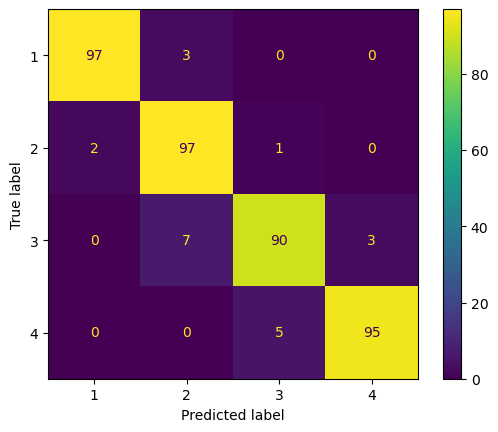

In [17]:
#Plotting the confusion matrix

confusion_matrix = metrics.confusion_matrix(y_test,y_predictions)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [1,2,3,4])
cm_display.plot()
plt.show()

In [18]:
#Finding the best k value

k_Range = 31
error_rate = []
for i in range(1,k_Range):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(x_train,y_train)
    predict_i = knn.predict(x_test)
    error_rate.append(np.mean(predict_i != y_test))

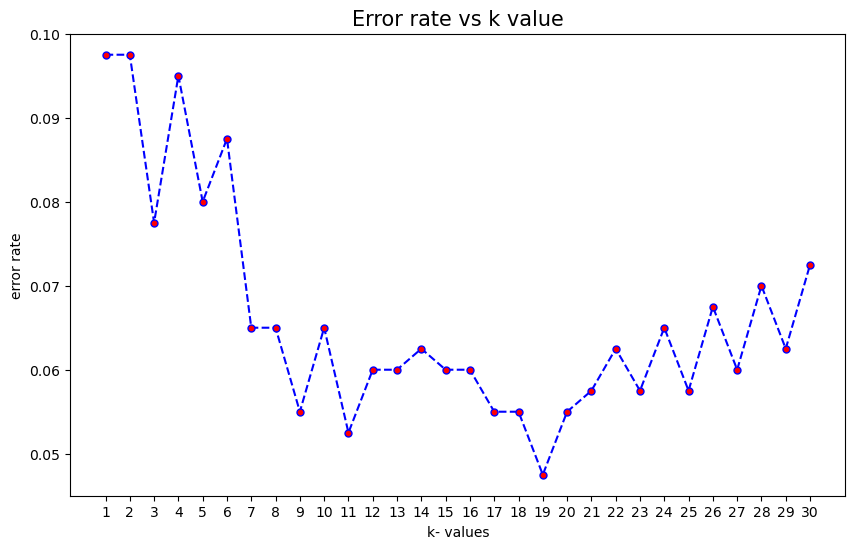

Minimum error:- 0.0475 at K = 19


In [19]:
#plotting the error rate vs k graph to identify the best k

plt.figure(figsize=(10,6))
plt.plot(range(1,(k_Range)),error_rate,marker="o",markerfacecolor="red",
         linestyle="dashed",color="blue",markersize=5)
plt.title("Error rate vs k value",fontsize=15)
plt.xlabel("k- values",fontsize=10)
plt.ylabel("error rate",fontsize=10)
plt.xticks(range(1,(k_Range)))
plt.show()

best_k_value = error_rate.index(min(error_rate))+1
print("Minimum error:-",min(error_rate),"at K =",best_k_value)

In [20]:
#Reapplying KNN algorithm on the determined best K value

model_knn = KNeighborsClassifier(n_neighbors=best_k_value)  
model_knn.fit(x_train, y_train)  

KNeighborsClassifier(n_neighbors=19)

In [21]:
#Determining the accuracy score for k=the best k value

y_predictions = knn.predict(x_test)
acc_score = accuracy_score(y_test,y_predictions)
print(acc_score)

0.9275


In [22]:
#Determining the confusion matrix for the best k value

confusionMatrix = metrics.confusion_matrix(y_test,y_predictions)
print(confusionMatrix)

[[96  4  0  0]
 [ 5 93  2  0]
 [ 0 11 88  1]
 [ 0  0  6 94]]


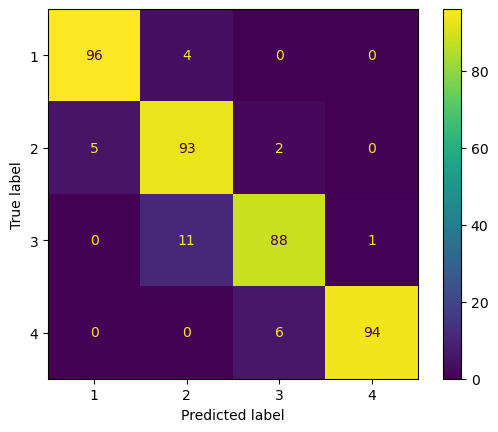

In [23]:
#Plotting the confusion matrix for the best k value

confusion_matrix = metrics.confusion_matrix(y_test,y_predictions)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [1,2,3,4])
cm_display.plot()
plt.show()